In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
arch = inceptionresnet_2
sz=320
bs = 32
path='data/hackerearth-myntra'

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

100%|██████████| 428/428 [04:46<00:00,  1.49it/s]


In [6]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 1325/1709 [00:15<00:04, 86.71it/s, loss=6.63]

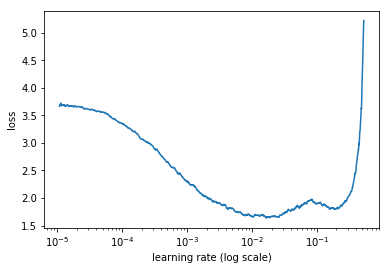

In [7]:
learn.sched.plot()

In [8]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 13%|█▎        | 229/1709 [00:04<00:28, 51.75it/s, loss=2.3] 

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.56698    1.360665   0.625949  
    1      1.429068   1.258823   0.641501                      
    2      1.40051    1.216746   0.648511                      
    3      1.333651   1.193242   0.655593                      
    4      1.29512    1.178823   0.654863                      



[1.1788229, 0.65486273364485981]

In [9]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.284966   1.162661   0.65844   
    1      1.234187   1.149581   0.66377                       
    2      1.236325   1.14281    0.665596                      
    3      1.242633   1.132712   0.666837                      
    4      1.186026   1.122478   0.67078                       



[1.1224785, 0.67077978971962615]

In [10]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.199729   1.120601   0.671802  
    1      1.16074    1.117813   0.670926                      
    2      1.24532    1.116222   0.672094                      
    3      1.181034   1.114469   0.672167                      
    4      1.22544    1.1146     0.670561                      



[1.1146001, 0.67056074766355145]

In [11]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.154764   1.111511   0.674065  
    1      1.195314   1.112083   0.672459                      
    2      1.259221   1.114461   0.673408                      
    3      1.174467   1.106271   0.674284                      
    4      1.154441   1.108457   0.673116                      



[1.1084572, 0.67311623831775702]

In [12]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [13]:
log_preds,y = learn.TTA()


In [14]:
probs = np.mean(np.exp(log_preds),0)

In [15]:
accuracy_np(probs, y)

0.67237342698273339

In [16]:
y[10]=9

In [17]:
predictions = np.argmax(probs,axis=1)

In [18]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[  44    0    3    0    2   11   24   32  117    0    1    0   19    0    0   64    0    0   25    6    0
     0  106    0]
 [   6   13    0    0    0    1    0    0   24    0    1    0   11    0    0    2    0    0    0    2    0
     0   64    0]
 [   6    0   14    0    2    0    2    0    5    0    0    0    0    0    0    6    0    0    2    0    0
     0    8    0]
 [   1    0    0   11    0    0    0    8    0    0    0    0    0    0    0   13    0    0   12    0    0
     0    1    0]
 [   0    0    0    0  182    0    0    4    6    0    0    0    0    0    0  249    0    0   35    0    0
     0   37    0]
 [   8    0    0    0    1  101   18   31   41    0    2    0    1    0    0   18    0    0    3    0    0
     0   48    0]
 [  13    0    0    0    2    8  132   10   55    0    3    0    2    0    0   18    0    0    7    0    0
     0   57    0]
 [  12    0    1    0    8   23    4  112   35    0    0    0    0    0    0  117    

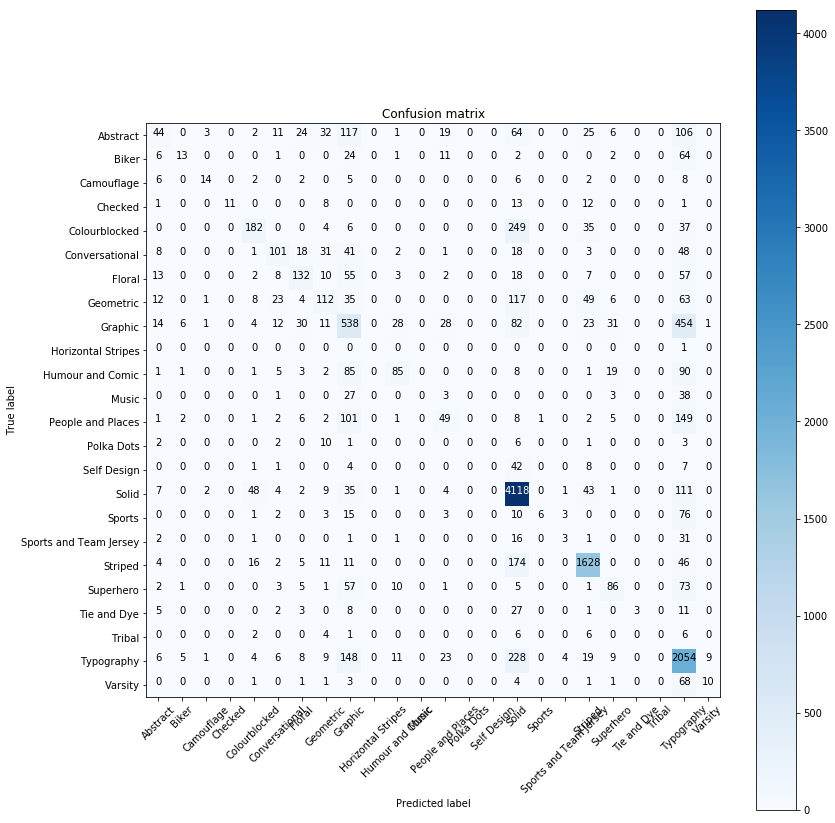

In [19]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.09692  0.       0.00661  0.       0.00441  0.02423  0.05286  0.07048  0.25771  0.       0.0022   0.
   0.04185  0.       0.       0.14097  0.       0.       0.05507  0.01322  0.       0.       0.23348  0.     ]
 [ 0.04839  0.10484  0.       0.       0.       0.00806  0.       0.       0.19355  0.       0.00806  0.
   0.08871  0.       0.       0.01613  0.       0.       0.       0.01613  0.       0.       0.51613  0.     ]
 [ 0.13333  0.       0.31111  0.       0.04444  0.       0.04444  0.       0.11111  0.       0.       0.       0.
   0.       0.       0.13333  0.       0.       0.04444  0.       0.       0.       0.17778  0.     ]
 [ 0.02174  0.       0.       0.23913  0.       0.       0.       0.17391  0.       0.       0.       0.       0.
   0.       0.       0.28261  0.       0.       0.26087  0.       0.       0.       0.02174  0.     ]
 [ 0.       0.       0.       0.       0.35478  0.       0.       0.0078   0.0117   0.       0.       0.    

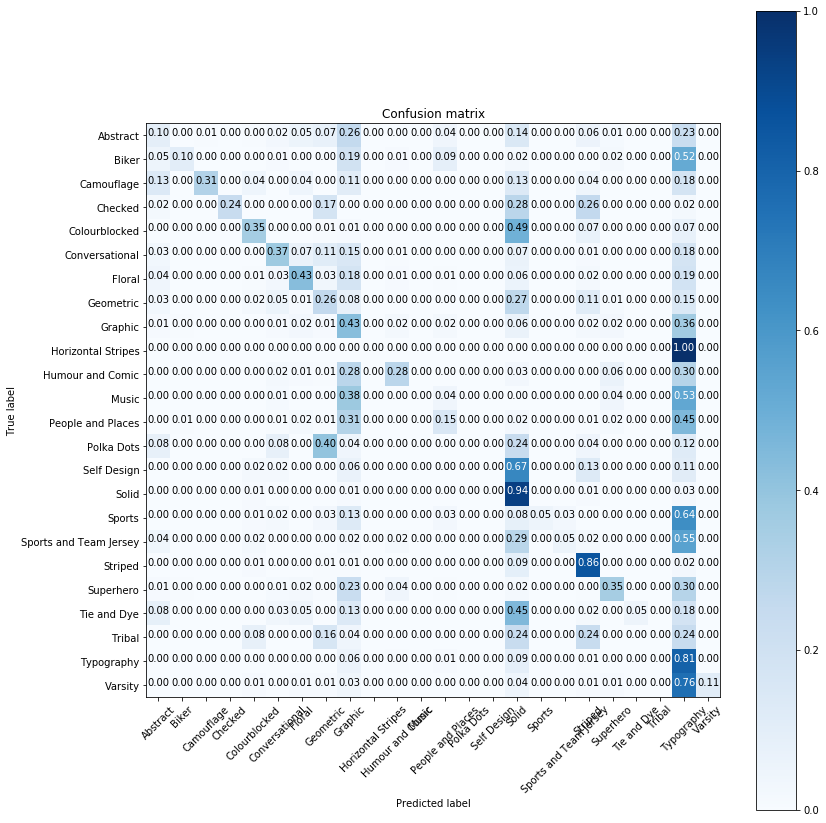

In [20]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

# 0.2 -> must overfit a bit 

In [21]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [22]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▉  | 1356/1709 [00:14<00:03, 95.18it/s, loss=6.36]

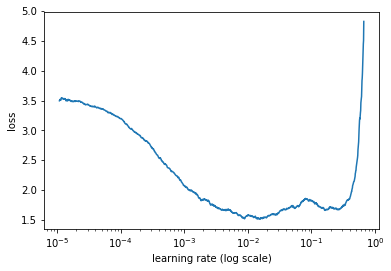

In [23]:
learn.sched.plot()

In [24]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 14%|█▎        | 234/1709 [00:05<00:35, 41.74it/s, loss=1.56]

Exception in thread Thread-32:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.238653   1.176099   0.658879  
    1      1.157384   1.136263   0.667275                      
    2      1.122203   1.105844   0.675891                      
    3      1.097164   1.082537   0.68531                       
    4      1.077665   1.070188   0.683995                       



[1.0701877, 0.68399532710280375]

In [25]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      1.038923   1.071561   0.688011  
    1      0.992062   1.053712   0.691881                       



[1.0537124, 0.69188084112149528]

In [26]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      1.002569   1.044496   0.69502   
    1      0.939916   1.044553   0.696116                       



[1.0445533, 0.6961156542056075]

In [27]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.870883   1.030078   0.699985  
    1      0.884119   1.020879   0.701227                       
    2      0.87558    1.017745   0.703417                       
    3      0.819281   1.02012    0.702979                       
    4      0.841842   1.019705   0.703125                       



[1.0197049, 0.703125]

In [28]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.803381   1.02041    0.706338  
    1      0.844478   1.011049   0.708674                       



[1.0110487, 0.70867406542056077]

In [29]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.801747   1.013915   0.706046  
    1      0.833095   1.009592   0.707579                       



[1.0095917, 0.70757885514018692]

In [30]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.799823   1.00961    0.707652  
    1      0.740347   1.006195   0.710207                       



[1.0061948, 0.71020735981308414]

In [90]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.7901     1.007096   0.709331  
    1      0.815228   1.008699   0.710426                       
    2      0.824574   1.00763    0.70955                        
    3      0.802295   1.010044   0.711522                       
    4      0.772695   1.007113   0.711157                       



[1.0071125, 0.71115654205607481]

In [91]:
log_preds,y = learn.TTA()


In [92]:
probs = np.mean(np.exp(log_preds),0)

In [93]:
accuracy_np(probs, y)

0.71085747731928595

In [94]:
y[10]=9

In [95]:
predictions = np.argmax(probs,axis=1)

In [96]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[  99    3    1    0    0   15   16   31   98    0    3    1   21    1    1   50    0    0   18   11    2
     1   82    0]
 [   4   40    0    0    0    1    0    0   27    0    1    1    4    0    0    2    0    0    0    1    0
     0   42    1]
 [   8    0   18    0    1    0    2    2    5    0    0    0    0    0    0    2    0    0    1    0    0
     0    6    0]
 [   1    0    0   19    0    0    0    5    0    0    1    0    0    0    0   10    0    0   10    0    0
     0    0    0]
 [   1    0    0    0  262    0    0    6    3    0    2    0    0    0    0  174    1    0   40    0    0
     0   24    0]
 [  16    0    0    0    1  112   17   24   37    0    8    0    2    1    0   13    1    0    3    0    0
     0   37    0]
 [  14    1    0    0    1   15  161    6   36    0    1    0    2    0    0   19    0    0    6    0    0
     0   45    0]
 [  21    0    1    2    8   18    7  155   23    0    2    0    0    0    1   89    

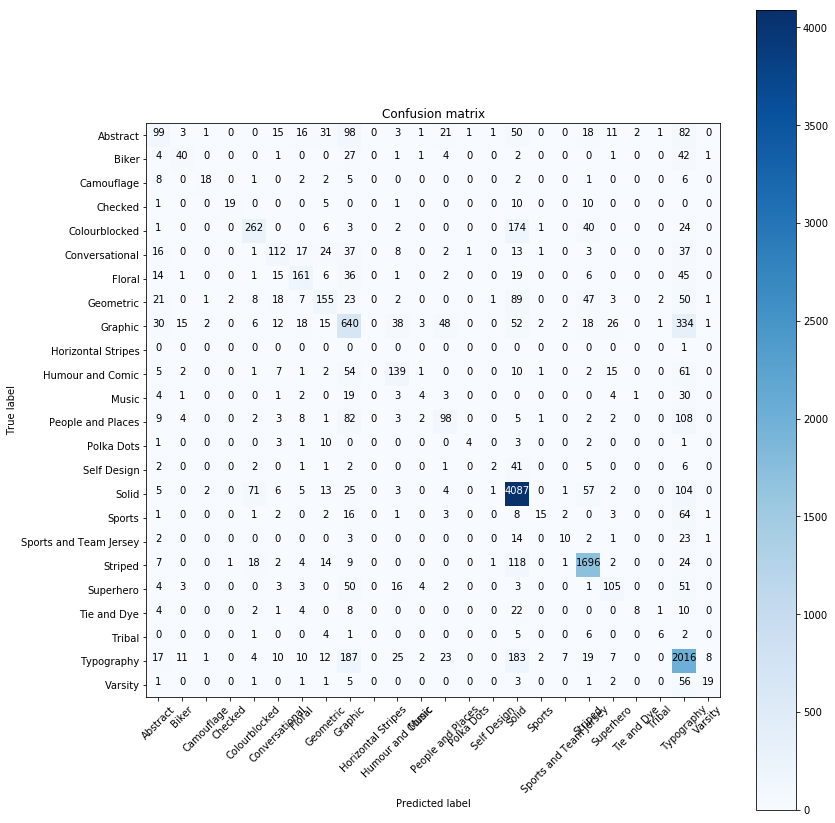

In [97]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.21806  0.00661  0.0022   0.       0.       0.03304  0.03524  0.06828  0.21586  0.       0.00661  0.0022
   0.04626  0.0022   0.0022   0.11013  0.       0.       0.03965  0.02423  0.00441  0.0022   0.18062  0.     ]
 [ 0.03226  0.32258  0.       0.       0.       0.00806  0.       0.       0.21774  0.       0.00806  0.00806
   0.03226  0.       0.       0.01613  0.       0.       0.       0.00806  0.       0.       0.33871  0.00806]
 [ 0.17778  0.       0.4      0.       0.02222  0.       0.04444  0.04444  0.11111  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.02222  0.       0.       0.       0.13333  0.     ]
 [ 0.02174  0.       0.       0.41304  0.       0.       0.       0.1087   0.       0.       0.02174  0.       0.
   0.       0.       0.21739  0.       0.       0.21739  0.       0.       0.       0.       0.     ]
 [ 0.00195  0.       0.       0.       0.51072  0.       0.       0.0117   0.00585  0.       0.0039

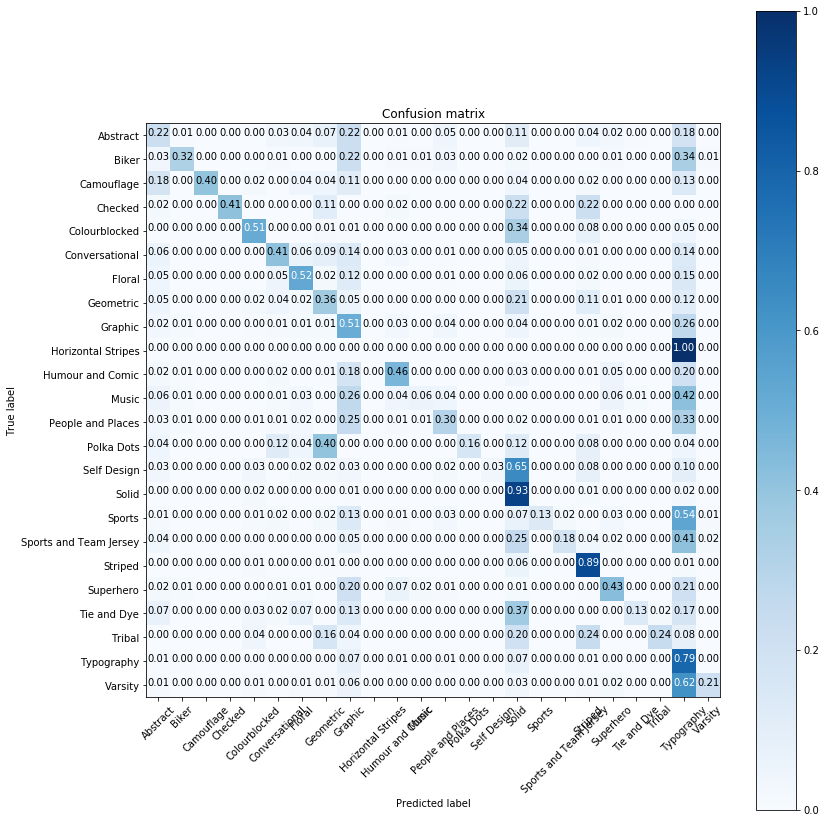

In [98]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [99]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.val_dl))


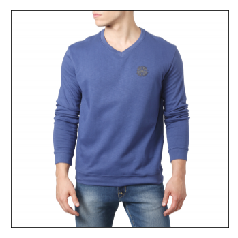

In [100]:
show_img(data.val_ds.denorm(to_np(x))[3]);